In [1]:
import scanpy as sc
adata=sc.read("data/adata_tree.h5ad")

In [2]:
import scFates as scf

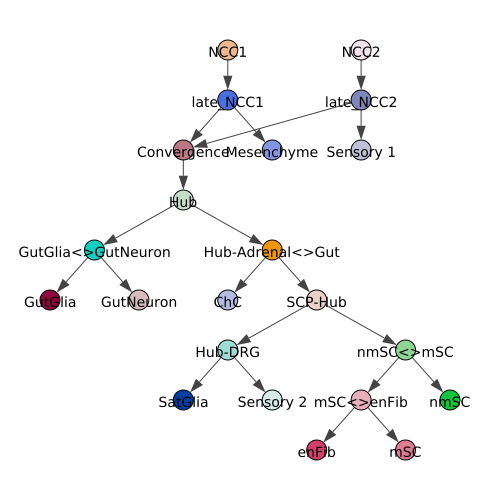

In [3]:
scf.pl.milestones(adata,layout="reingold_tilford")

In [4]:
r="NCC2"
m=["GutGlia","nmSC<>mSC"]

In [5]:
scf.tl.subset_tree(adata,root_milestone=r,milestones=m)

subsetting tree
node 280 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [6]:
scf.tl.dendrogram(adata,crowdedness=.1)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


In [7]:
maxt=adata.obs.t[adata.obs.seg=="2"].max()

In [8]:
scf.tl.subset_tree(adata,mode="pseudotime",t_max=maxt)

subsetting tree
node 280 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree subsetted


In [9]:
scf.tl.pseudotime(adata,n_jobs=40,n_map=100)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:28<00:00,  3.46it/s]
    finished (0:00:29) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [10]:
scf.tl.dendrogram(adata,crowdedness=.1)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


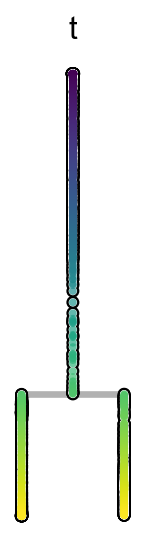

In [11]:
sc.set_figure_params(figsize=(1,4),frameon=False)
scf.pl.dendrogram(adata,color="t",tree_behind=True,add_outline=True,clip_on=False,show_info=False)

In [12]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [02:08<00:00, 169.18it/s]
    found 3963 significant features (0:02:08) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [13]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 3963/3963 [01:03<00:00, 62.38it/s]
    finished (adata subsetted to keep only fitted features!) (0:01:09) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


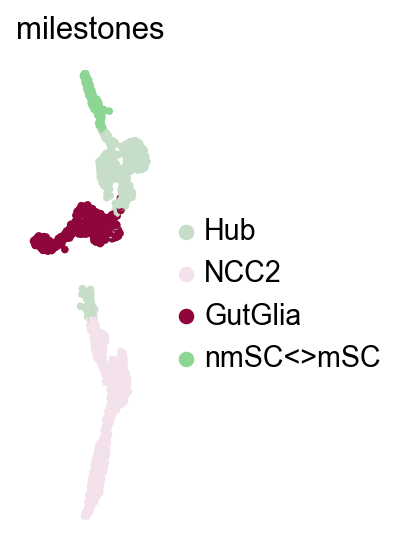

In [14]:
sc.pl.umap(adata,color="milestones")


In [15]:
scf.tl.rename_milestones(adata,["bifurcation","NCCs","iSCs","Enteric Glia"])

In [16]:
r="NCCs"
m=["Enteric Glia","iSCs"]

In [17]:
scf.tl.test_fork(adata,r,m,n_jobs=40)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:157: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 3963/3963 [00:31<00:00, 124.01it/s]
    test for upregulation for each leave vs root
    upreg iSCs: 100%|██████████| 2243/2243 [00:03<00:00, 575.57it/s]
    finished (0:00:40) --> added 
    .uns['NCCs->Enteric Glia<>iSCs']['fork'], DataFrame with fork test results.


In [18]:
scf.tl.branch_specific(adata,r,m,effect=1)

    branch specific features: iSCs: 77, Enteric Glia: 24
    finished --> updated 
    .uns['NCCs->Enteric Glia<>iSCs']['fork'], DataFrame updated with additionnal 'branch' column.


In [19]:
scf.tl.activation(adata,r,m,n_jobs=20,nwin=10,deriv_cut=.3,pseudotime_offset=0.005)

testing activation
    to iSCs: 100%|██████████| 77/77 [00:01<00:00, 47.56it/s]
    threshold pseudotime is: 0.0439749631633998
    13 early and 11 late features specific to leave Enteric Glia
    26 early and 51 late features specific to leave iSCs
    finished (0:00:25) --> updated 
    .uns['NCCs->Enteric Glia<>iSCs']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


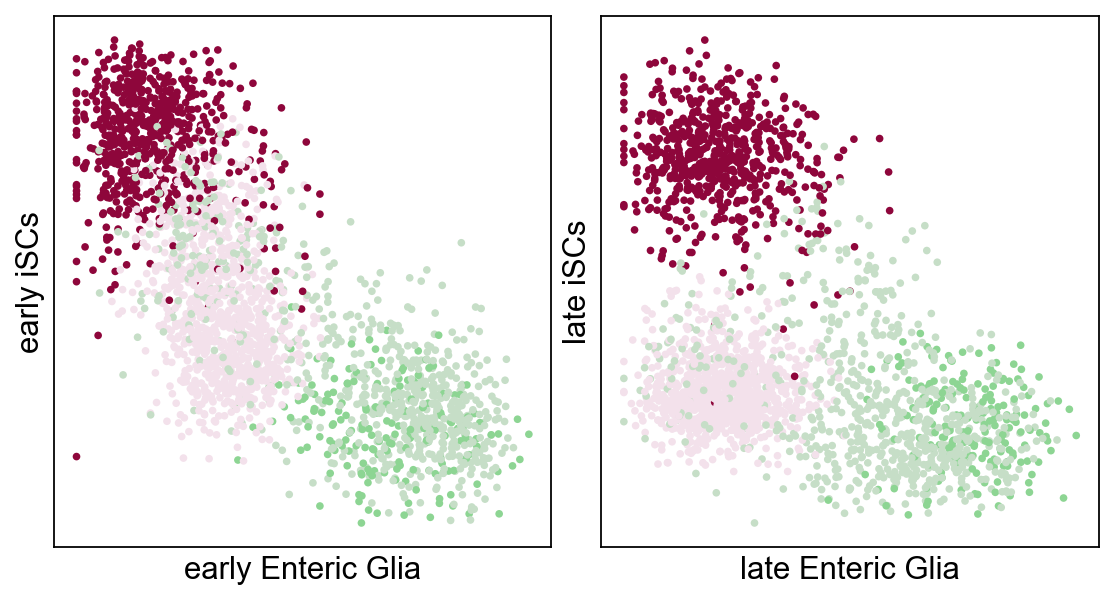

In [20]:
sc.set_figure_params()
scf.pl.modules(adata,r,m)

In [21]:
scf.tl.activation(adata,r,m,n_jobs=20,nwin=10,deriv_cut=.25,pseudotime_offset=0.005)

testing activation
    to iSCs: 100%|██████████| 77/77 [00:01<00:00, 44.99it/s]
    threshold pseudotime is: 0.0439749631633998
    19 early and 5 late features specific to leave Enteric Glia
    40 early and 37 late features specific to leave iSCs
    finished (0:00:02) --> updated 
    .uns['NCCs->Enteric Glia<>iSCs']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


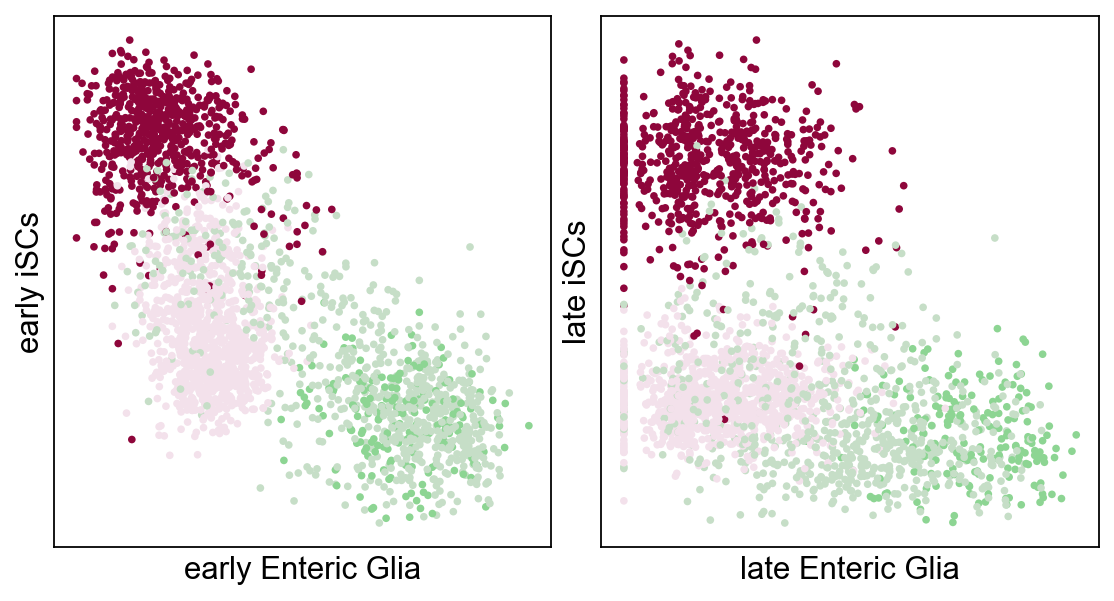

In [22]:
scf.pl.modules(adata,r,m)

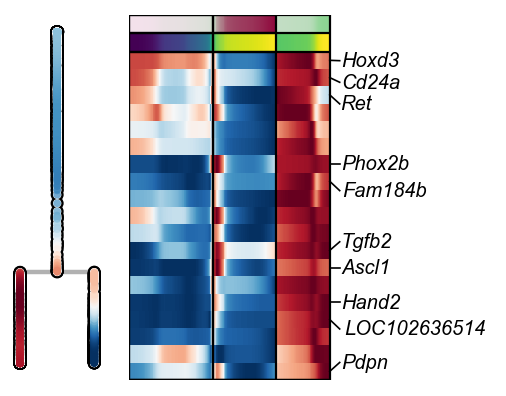

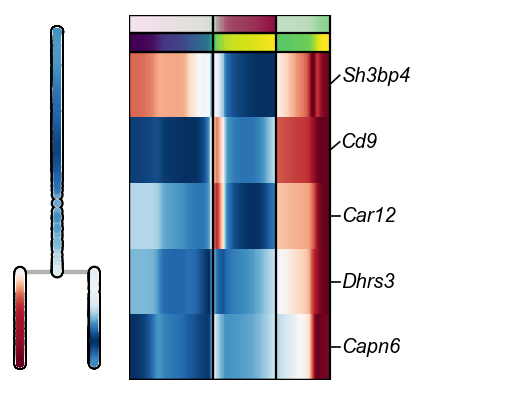

In [23]:
sc.set_figure_params(figsize=(1,4))

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

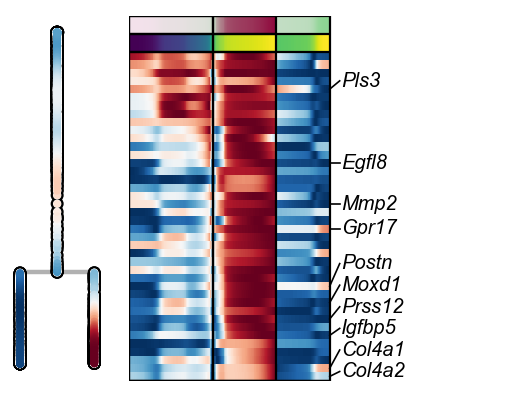

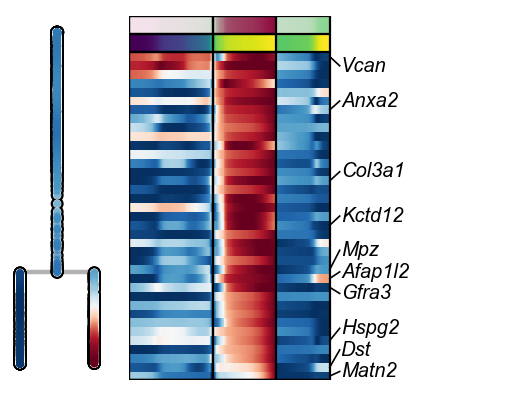

In [24]:
scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

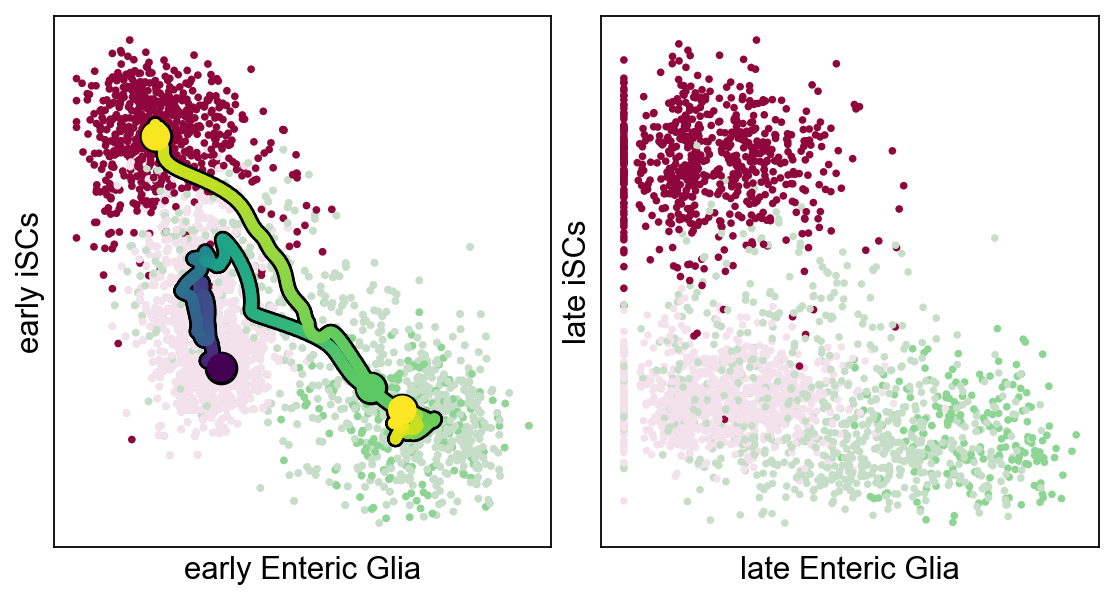

In [25]:
sc.set_figure_params()
scf.pl.modules(adata,r,m,show_traj=True)

In [26]:
scf.tl.slide_cells(adata,r,m,win=100)

--> added 
    .uns['NCCs->Enteric Glia<>iSCs']['cell_freq'], probability assignment of cells on 29 non intersecting windows.


In [27]:
scf.tl.slide_cors(adata,r,m)

--> added 
    .uns['NCCs->Enteric Glia<>iSCs']['corAB'], gene-gene correlation modules.


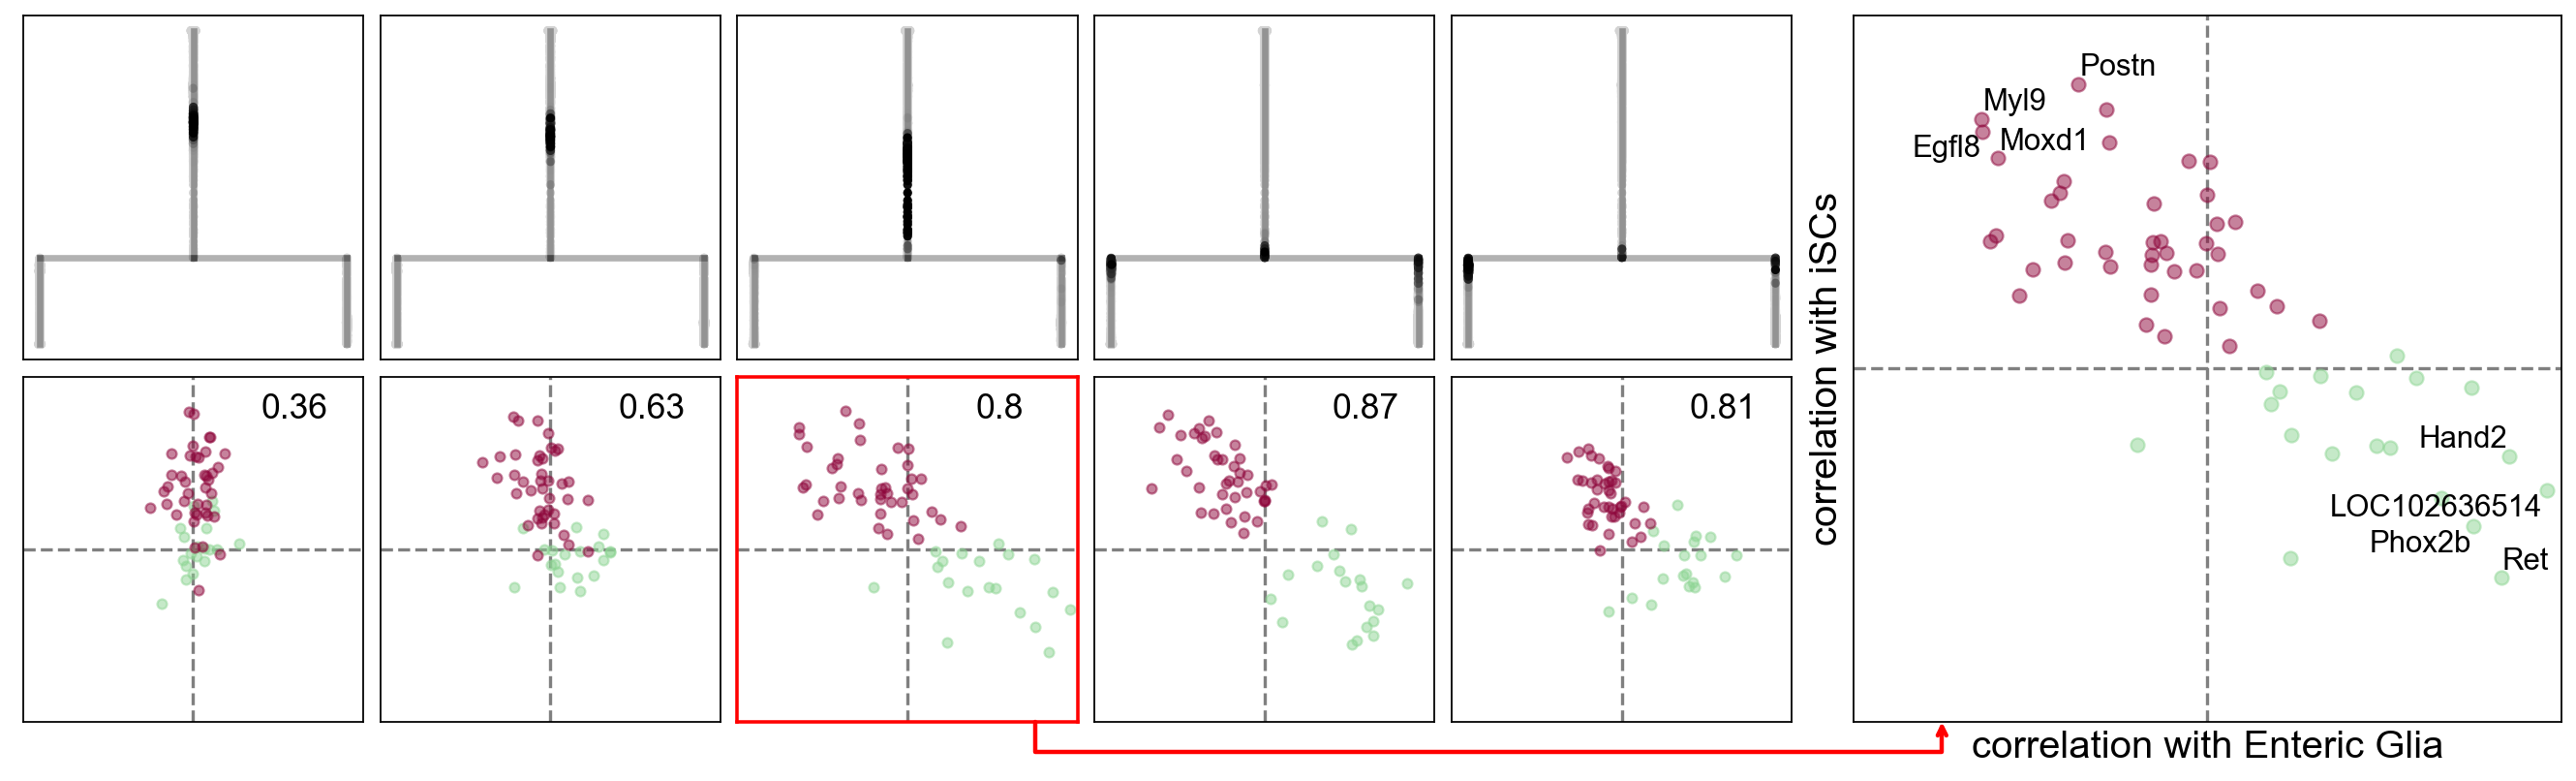

In [28]:
scf.pl.slide_cors(adata,r,m,basis="dendro",win_keep=range(8,13),focus=2)

In [29]:
scf.tl.synchro_path(adata,r,m,winp=10,w=20,step=5)

computing local correlations
    single mapping
    to iSCs: 100%|██████████| 368/368 [00:03<00:00, 93.86it/s]
    finished (0:00:17) --> added 
    .uns['NCCs->Enteric Glia<>iSCs']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor NCCs->Enteric Glia<>iSCs'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


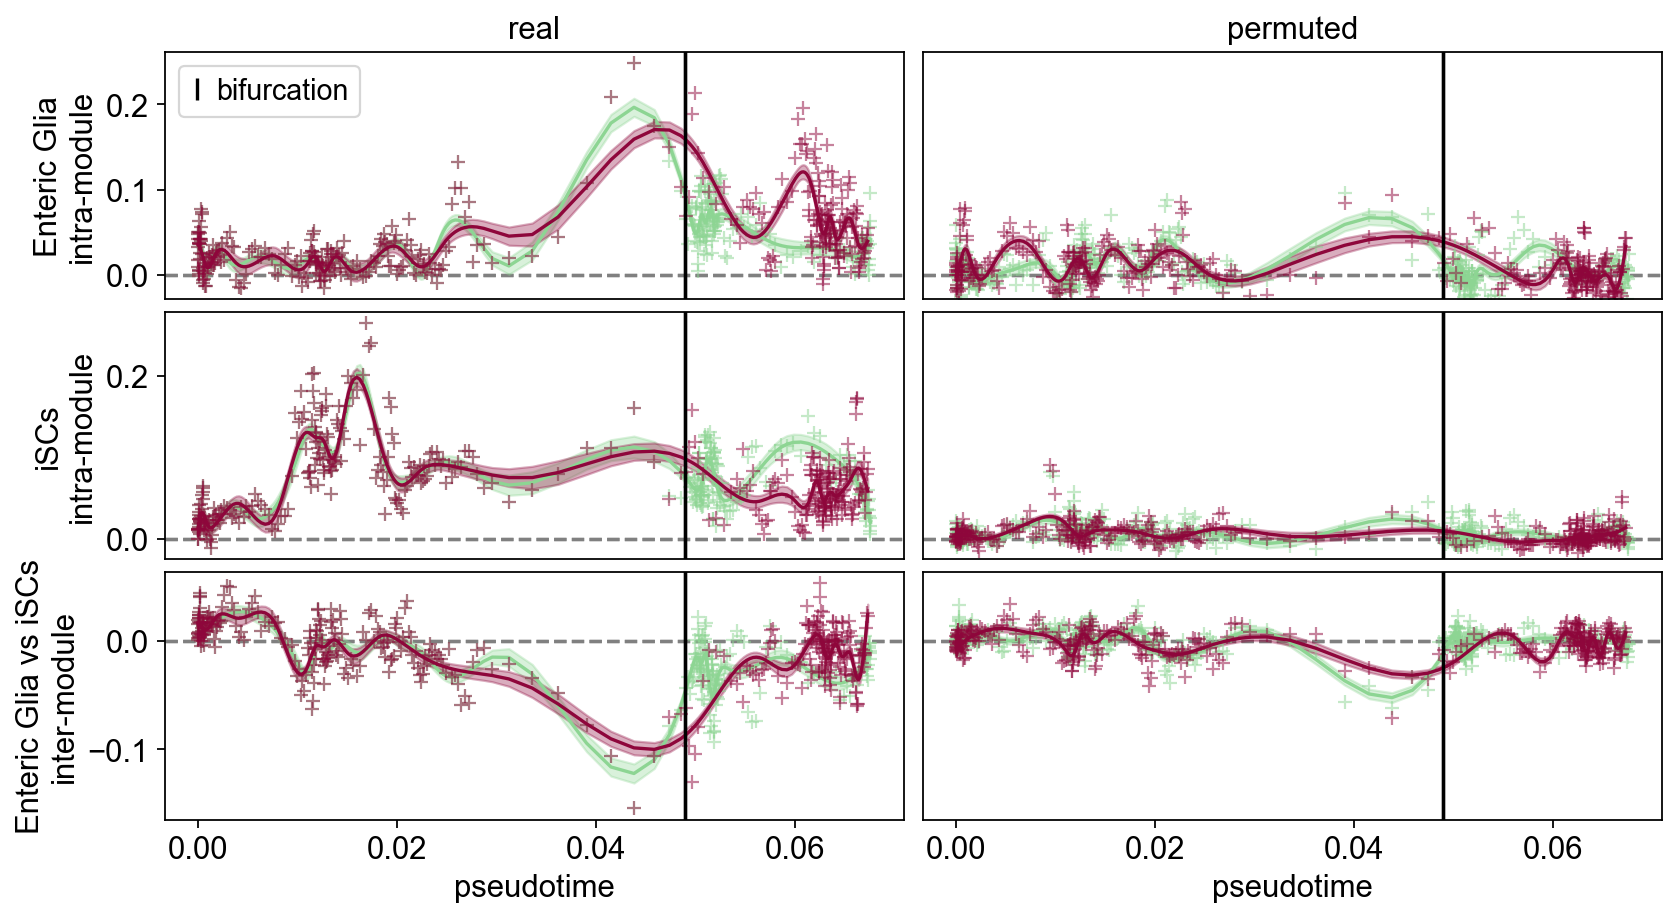

In [30]:
scf.pl.synchro_path(adata,r,m,knots=30)

In [31]:
scf.tl.synchro_path(adata,r,m,winp=10,w=20,step=5,n_jobs=80,n_map=100)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:50<00:00,  1.97it/s]
    finished (0:02:16) --> added 
    .uns['NCCs->Enteric Glia<>iSCs']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor NCCs->Enteric Glia<>iSCs'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


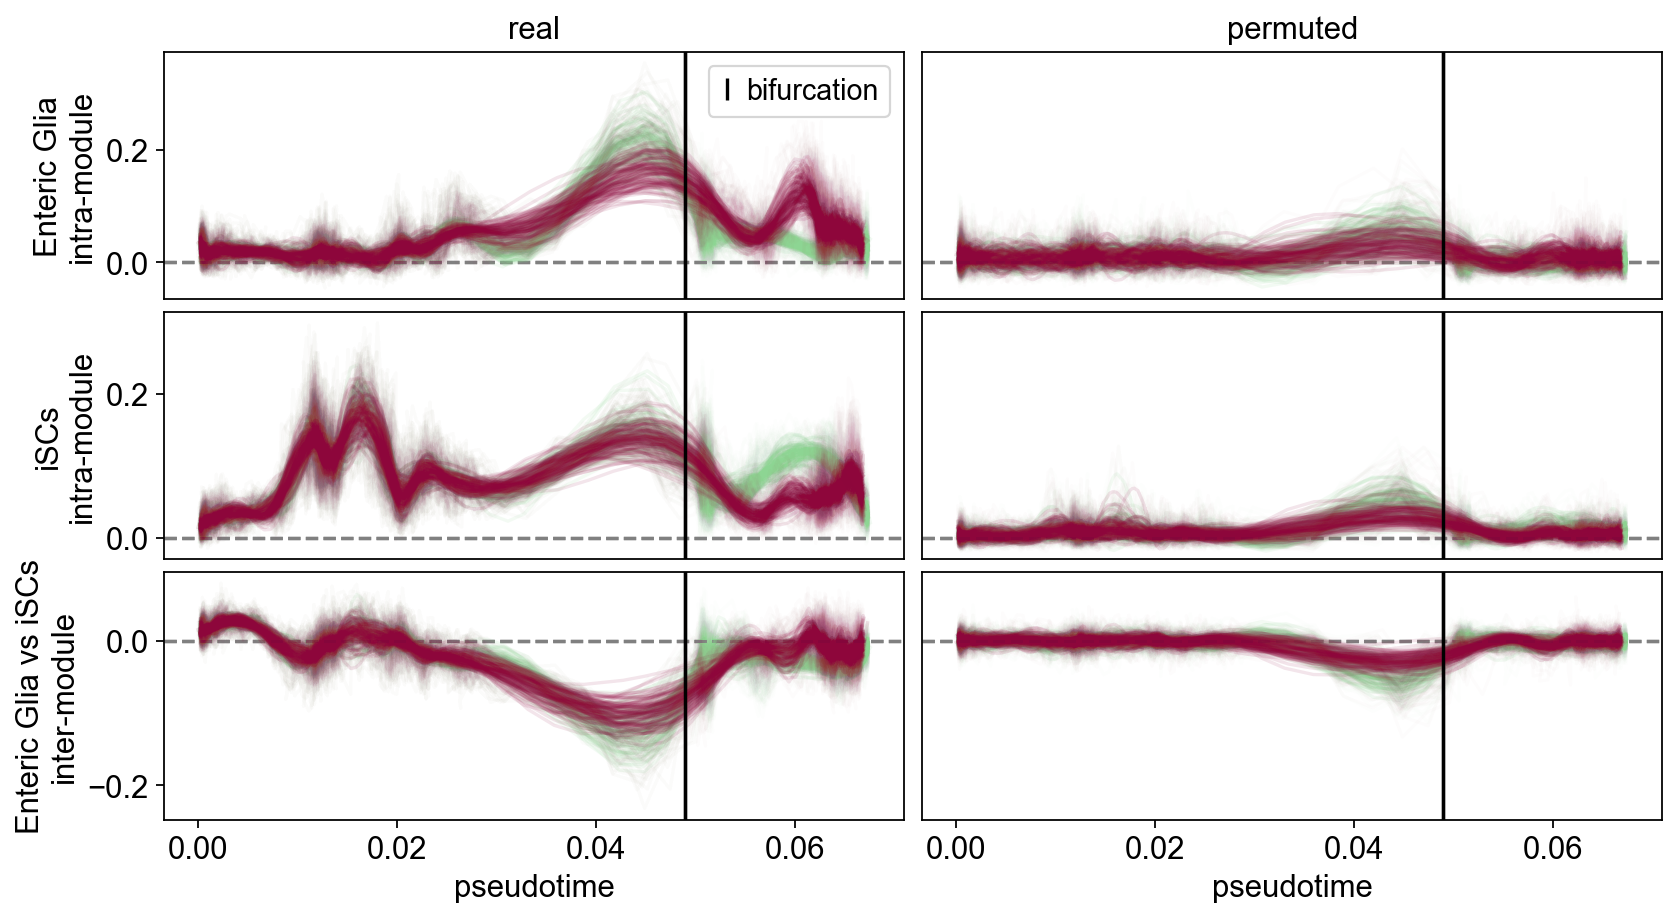

In [32]:
scf.pl.synchro_path(adata,r,m,knots=30)

In [33]:
adata.write("data/adata_bif_GutGLiaSC.h5ad")